In [19]:
# ライブラリのインポート
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import roc_curve
from sklearn.tree import export_graphviz
from PIL import Image
import pydotplus
import io

ModuleNotFoundError: No module named 'pydotplus'

In [20]:
# CSVデータの読み込み
train = pd.read_csv('train.csv',index_col='id')
test = pd.read_csv('test.csv',index_col='id')
#submit = pd.read_csv('submit_sample.csv',header=None,names=['id','y'],index_col='id')

#確認
print(train.shape)
print(test.shape)
#print(submit.shape)
#print(submit.head())

(27128, 17)
(18083, 16)


In [21]:
# trainをダミー変数化
train_dummy = pd.get_dummies(train)

# 目的変数(y)を抽出する
data_y = train_dummy['y']
print(data_y.shape)

# 説明変数を抽出する
data_X = train_dummy.drop('y',axis=1)
print(data_X.shape)
display(data_X.head())

(27128,)
(27128, 51)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
id,,,,,,,,,,,,,,,,,,,,,
1,39,1756,3,939,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,51,1443,18,172,10,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,36,436,13,567,1,595,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,63,474,25,423,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,31,354,30,502,1,9,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# data_Xとdata_yを学習データと評価データに分ける
train_X,test_X,train_y,test_y = train_test_split(data_X,data_y,test_size=0.25,random_state=0)

# 学習データの行数
print(train_X.shape[0])

# 評価データの行数
print(test_X.shape[0])

20346
6782


In [29]:
# 決定木モデルの準備
tree = DT(max_depth=4,random_state=0)

# 決定木モデルの学習
tree.fit(train_X,train_y)

# 重要度の表示
print(tree.feature_importances_)

# 重要度に名前を付けて表示
print(pd.Series(tree.feature_importances_,index=train_X.columns))

# 評価用データの予測(確率値)
pred_y1 = tree.predict_proba(test_X)[:,1]
print(pred_y1)


[0.         0.00302985 0.00263413 0.58200696 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0600374
 0.         0.         0.00306351 0.         0.01448216 0.
 0.         0.         0.         0.         0.         0.
 0.01030771 0.         0.00398346 0.         0.         0.
 0.         0.32045481 0.        ]
age                    0.000000
balance                0.003030
day                    0.002634
duration               0.582007
campaign               0.000000
pdays                  0.000000
previous               0.000000
job_admin.             0.000000
job_blue-collar        0.000000
job_entrepreneur       0.000000
job_housemaid          0.000000
job_management         0.000000
job_retired            0.000000
job_self-employed      0.000000
job_services           0.000000
job_st

### モデルの評価

0.8418474134130212


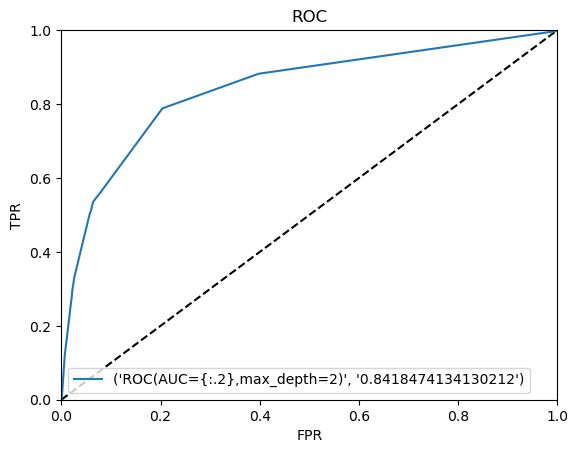

In [30]:
# 実測値test_yと予測値pred_y1を使ってAUCを計算する
auc1 = roc_auc_score(test_y,pred_y1)
print(auc1)

# ROC曲線を作成する
fpr,tpr,thresholds = roc_curve(test_y,pred_y1)

roc_label = "ROC(AUC={:.2},max_depth=2)",format(auc1)
plt.plot([0,1],[0,1],color='black',linestyle='dashed')
plt.title('ROC')
plt.plot(fpr,tpr,label=roc_label)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

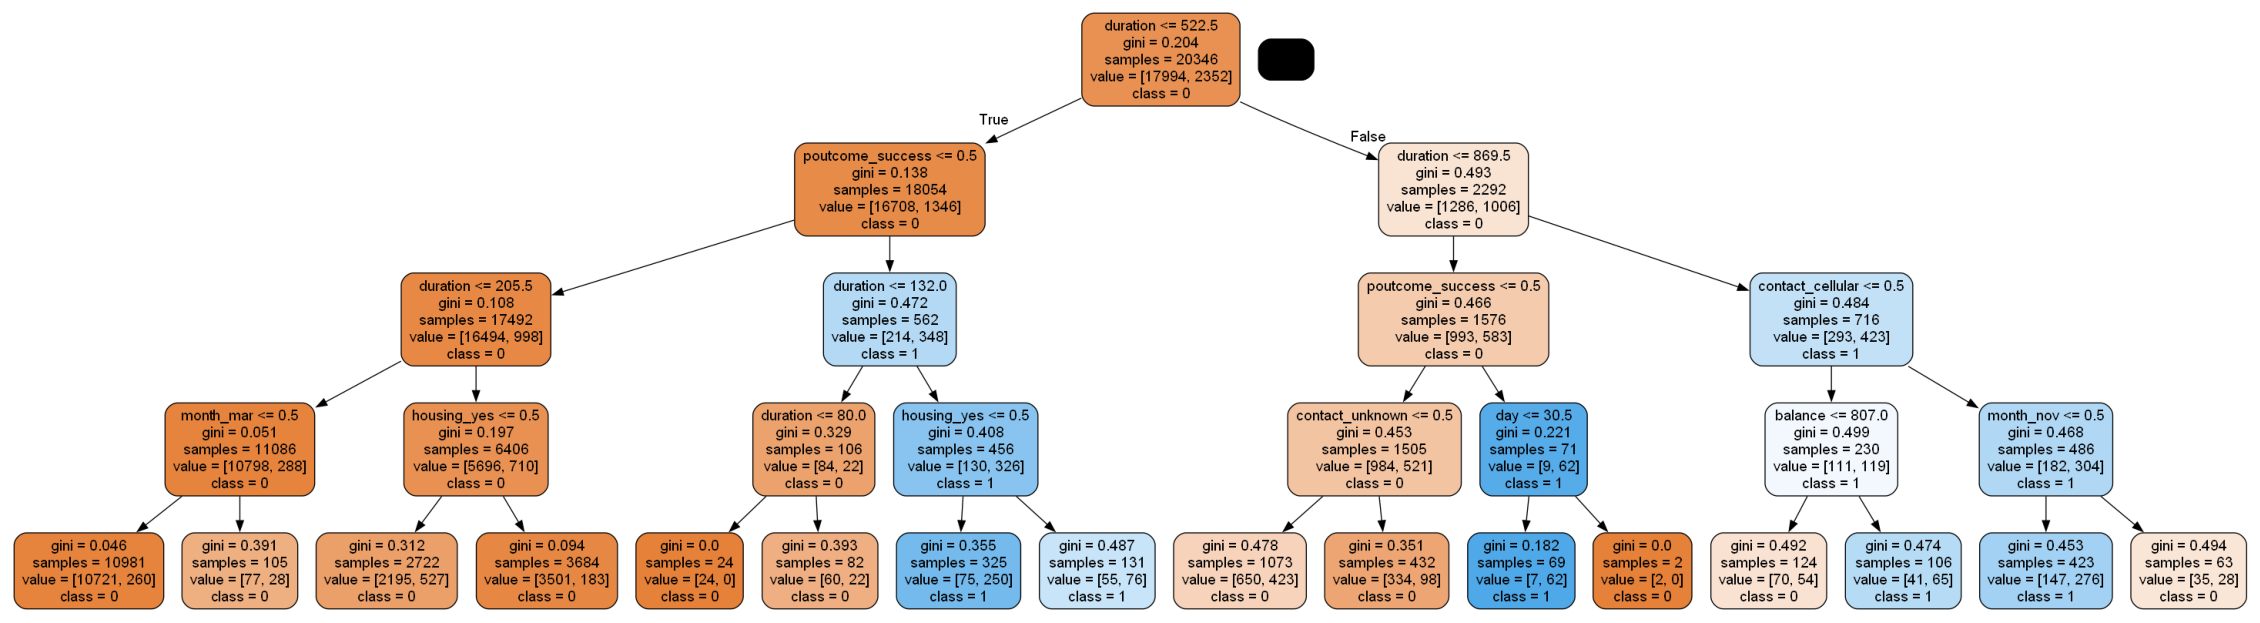

In [31]:
export_graphviz(tree,out_file="tree.dot",feature_names=train_X.columns, class_names=["0","1"], filled=True, rounded=True)
# 決定木を描画する
g = pydotplus.graph_from_dot_file(path="tree.dot")
gg = g.create_png()
img = io.BytesIO(gg)
img2 = Image.open(img)
plt.figure(figsize=(img2.width/100,img2.height/100),dpi=100)
plt.imshow(img2)
plt.axis("off")
plt.show()